# core

> Fill in a module description here

In [92]:
#| default_exp core

In [93]:
#| hide
from nbdev.showdoc import *

supply function 0 + 5 * x
demand function 9 - 3 * x
cannot multiply variables with zero
zero_points 3
price is around 5.625
zero_points 3
end is 3
[0, 1, 2, 3]
supply_dict{0: 0.0, 1: 5.0, 2: 10.0, 3: 15.0}
[0, 1, 2, 3]
demand_dict{0: 0.0, 1: 5.0, 2: 10.0, 3: 15.0, 9/8: 45/8}
x_range is: [0.    1.125]
supply curve is:[0.    5.625]
demand curve is: [9.    5.625]
price curve is: [5.625 5.625]


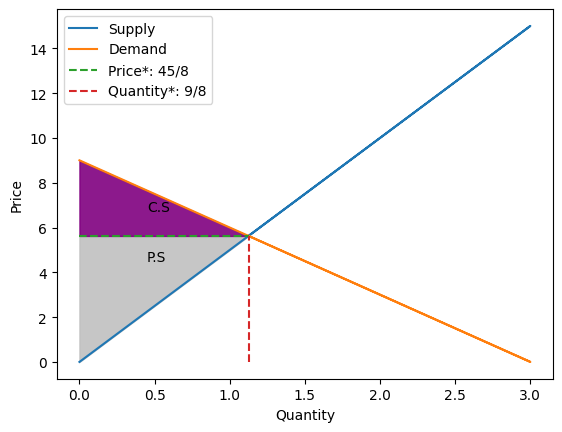

supply function 0 + 4 * x
demand function 6 - 2 * x
cannot multiply variables with zero
zero_points 3
price is around 4
zero_points 3
end is 3
[0, 1, 2, 3]
supply_dict{0: 0.0, 1: 4.0, 2: 8.0, 3: 12.0}
[0, 1, 2, 3]
demand_dict{0: 0.0, 1: 4, 2: 8.0, 3: 12.0}
x_range is: [0. 1.]
supply curve is:[0. 4.]
demand curve is: [6. 4.]
price curve is: [4. 4.]


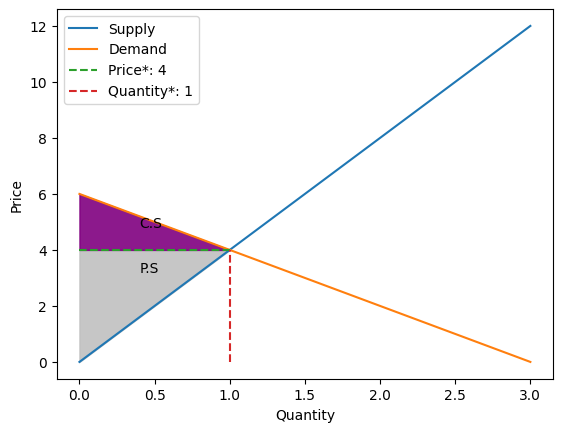

supply function 1 + 5 * x
demand function 9 - 2 * x
cannot multiply variables with zero
zero_points 9/2
price is around 6.714
zero_points 9/2
end is 4
[0, 1, 2, 3, 4]
supply_dict{0: 1.0, 1: 6.0, 2: 11.0, 3: 16.0, 4: 21.0}
[0, 1, 2, 3, 4]
demand_dict{0: 1.0, 1: 6.0, 2: 11.0, 3: 16.0, 4: 21.0, 8/7: 47/7}
x_range is: [0.         1.14285714]
supply curve is:[1.         6.71428571]
demand curve is: [9.         6.71428571]
price curve is: [6.71428571 6.71428571]


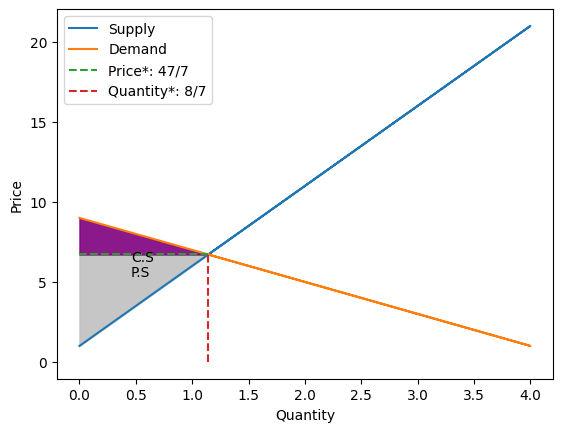

supply function 1 + 3 * x
demand function 6 - 1 * x
cannot multiply variables with zero
zero_points 6
price is around 4.750
zero_points 6
end is 6
[0, 1, 2, 3, 4, 5, 6]
supply_dict{0: 1.0, 1: 4.0, 2: 7.0, 3: 10.0, 4: 13.0, 5: 16.0, 6: 19.0}
[0, 1, 2, 3, 4, 5, 6]
demand_dict{0: 1.0, 1: 4.0, 2: 7.0, 3: 10.0, 4: 13.0, 5: 16.0, 6: 19.0, 5/4: 19/4}
x_range is: [0.   1.25]
supply curve is:[1.   4.75]
demand curve is: [6.   4.75]
price curve is: [4.75 4.75]


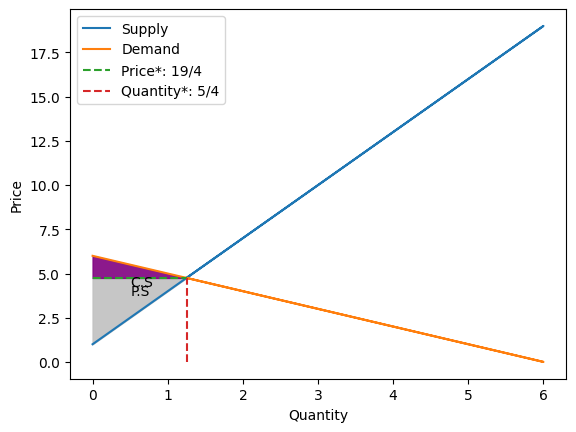

supply function 0 + 4 * x
demand function 9 - 3 * x
cannot multiply variables with zero
zero_points 3
price is around 5.143
zero_points 3
end is 3
[0, 1, 2, 3]
supply_dict{0: 0.0, 1: 4.0, 2: 8.0, 3: 12.0}
[0, 1, 2, 3]
demand_dict{0: 0.0, 1: 4.0, 2: 8.0, 3: 12.0, 9/7: 36/7}
x_range is: [0.         1.28571429]
supply curve is:[0.         5.14285714]
demand curve is: [9.         5.14285714]
price curve is: [5.14285714 5.14285714]


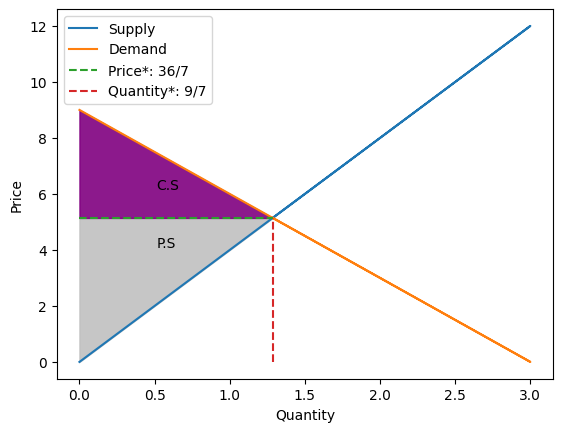

In [94]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy
import numpy as np
import random
import math

class Graph_free_market:
    def __init__(self) -> None:
        pass
        
    
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
    
    def market_graph(self, supply: str, demand: str, complete = False) -> None:
        print("cannot multiply variables with zero")
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        start = 0
        if "x" in demand:
            end = math.floor(self.get_zero_point(demand))
            print(f"end is {end}")
        else:
            end = 1.5 * math.floor(quantity)
        step = 1 
        

        if "x" in supply:
            supply_dict = self.get_calculate_values(supply, end)
            print(f"supply_dict{supply_dict}")
            supply_curve = sorted(list(supply_dict.values()) + [float(price)])
            supply_curve_domain = sorted(list(supply_dict.keys()) + [float(quantity)]) 
            supply_dict[quantity] = price


            #supply_curve_plot = plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            
        else:
            supply_list = [float(price) for i in range(start, math.ceil(end), step)] + [float(price)]
            supply_curve = supply_list

            
            #supply_curve_plot = plt.plot(supply_curve, label = "Supply") 
            plt.plot(supply_curve, label = "Supply") 
            
        
        if "x" in demand:
            demand_dict = self.get_calculate_values(demand, end)
            demand_dict[quantity] =  price
            print(f"demand_dict{supply_dict}")
            demand_curve = list(demand_dict.values()) + [float(price)]
            demand_curve_domain = sorted(list(demand_dict.keys()) + [float(quantity)]) 

            #demand_curve_plot = plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            
        else:
            demand_list = [float(price) for i in range(start, math.ceil(end), step)]
            demand_curve = demand_list + [float(price)]
            #demand_curve_plot = plt.plot(demand_curve, label = "Demand") 
            plt.plot(demand_curve, label = "Demand") 
            

        plt.xlabel("Quantity")
        plt.ylabel("Price")
        
        if complete == True:
            
            x_range = [i for i in range(0, math.floor(quantity))] + [float(quantity)]
            if len(x_range) <= 1:
                x_range = [i for i in range(0, math.ceil(quantity))] + [float(quantity)]

            y_range = [i for i in range(0, math.floor(price))] + [float(price)]
            if len(y_range) <= 1:
                y_range = [i for i in range(0, math.ceil(price))] +[float(price)]


            price_curve = np.array([price for i in range(len(x_range))], dtype=float) 
            quantum_curve = np.array([quantity for i in range(len(y_range))], dtype=float) 

            """ quantity_curve_plot = plt.plot(x_range,                              # x [i for i in range(len(price_curve))],
                                            price_curve,                         # y
                                            linestyle = "dashed", label = f"Price*: {price}")
            
            price_curve_plot = plt.plot(quantum_curve,                             # x 
                                        y_range,                                   # y [i for i in range(len(quantum_curve))]
                                        linestyle = "dashed", label = f"Quantity*: {quantity}") """
            
            plt.plot(x_range,                              # x [i for i in range(len(price_curve))],
                                            price_curve,                         # y
                                            linestyle = "dashed", label = f"Price*: {price}")
            
            plt.plot(quantum_curve,                             # x 
                                        y_range,                                   # y [i for i in range(len(quantum_curve))]
                                        linestyle = "dashed", label = f"Quantity*: {quantity}")
            
            

            if "x" in supply:
                price_curve = np.array(price_curve)
                supply_curve = np.array(supply_curve[0:len(price_curve) -1] + [float(price)])  
                
                x_range = np.array(x_range)
                
                # Create a valid boolean array for the 'where' condition
                condition = supply_curve[0:len(price_curve)]  <= price_curve

                demand_surplus_plot = plt.fill_between(x_range, supply_curve, price_curve, where = condition, color = "silver", alpha=0.9) # producer surplus

                x_width = float(quantity) * 0.4,
                y_height = (supply_curve[0] + price) * 0.6 if supply_curve[0] + price * 0.6 > price else price * 0.8


                plt.text(float(quantity) * 0.4, y_height, "P.S")
                

            if "x" in demand:
                price_curve = np.array(price_curve)
                demand_curve = np.array(demand_curve[0:len(price_curve)  - 1] + [float(price)])  
                
                x_range = np.array(x_range)

                condition = demand_curve[0:len(price_curve)] >= price_curve
            
                consumer_surplus_plot = plt.fill_between(x_range, demand_curve, price_curve, where = condition, color = "purple", alpha=0.9) # consumer surplus

                y_height = (demand_curve[0] + price) * 0.4 if (demand_curve[0] + price) * 0.4 < price else price * 1.2
                plt.text(float(quantity) * 0.4, y_height, "C.S")
            
            print(f"x_range is: {x_range}\nsupply curve is:{supply_curve}\ndemand curve is: {demand_curve}\nprice curve is: {price_curve}")

        plt.legend()

        """ plt.legend(handles = [consumer_surplus_plot, 
                              demand_surplus_plot,
                              price_curve_plot,
                              quantity_curve_plot,
                              demand_curve_plot,
                              supply_curve_plot], 
                              labels = ("Consumer Surplus", "Producer Surplus","Price*","Quantity*", 
                                        "Demand", "Supply"))  """
        plt.show()


    def get_calculate_values(self, expression: str, end: int) -> dict:
        start = 0
        step = 1 

        quantity = end
        end = math.ceil(end)

        value_pairs = {}
        equation_function = self.create_equation_function(expression)

        
        if equation_function:
            #value_pairs[x_val] = result """
            if end <= 1:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])
                print(x_values)
                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                result = float(equation_function(quantity))
                print(f"result from rational is {result}")
                value_pairs[x_val] = result


            else:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])
                print(x_values)
                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                
                
               # print(f"For x = {x_val}, the result is {result}")

        else:
            print("Error: Unable to create the equation function.")
        return value_pairs    
    

    def create_equation_function(self, equation_str: str) -> str:
        x = symbols('x')
        
        try:
            equation = parse_expr(equation_str)
            equation_function = lambda x_val: equation.subs(x, x_val)
            return equation_function
        except Exception as e:
            return None


    def get_zero_point(self, expression: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        equation = parse_expr(expression)
        
        # Calculate the equilibrium price and quantity
        zero_point = solve(equation, x)[0]
        print(f"zero_points {zero_point}")
        #print(zero_point)
        return zero_point
    
    
    def get_quantity(self, supply: str, demand: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(supply_eq, demand_eq), x))
        #print(quantity)
        return quantity
    

    def get_price(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        quantity = self.get_quantity(supply, demand)
        
        if "x" in demand:
            end = self.get_zero_point(demand)
        else:
            end = 2 * quantity
            
        # Create the equation from the supply and demand functions
        """ supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand) """
        
        equation_function = self.create_equation_function(demand)
        
        
        if "x" not in supply:
            price = float(supply)
        elif "x" not in demand:
            price = float(demand)
        else:
            price = equation_function(quantity)
             
        print(f"price is around {round(price, 3)}")
        return price


    def get_consumer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        """ supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand) """
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        consumer_surplus = parse_expr(f"{demand}-{price}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(consumer_surplus, (x, 0, quantity)) 
        
        return surplus
    

    def get_producer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        """ if "x" in supply:
            inverse_supply = solve(supply_eq - y, x)[0]
        else:
            inverse_supply = parse_expr(f"{supply}")
            
        if "x" in demand:    
            inverse_demand = solve(demand_eq - y, x)[0]
        else:
            inverse_demand = parse_expr(f"{demand}") """
        
        
        producer_surplus = parse_expr(f"{price}-{supply}")
            
        
        # Calculate consumer surplus
        surplus = sympy.integrate(producer_surplus, (y, 0, quantity)) 
        
        return surplus


    def get_economic_surplus(self, supply: str, demand: str) -> float:
        consumer = self.get_consumer_surplus(supply, demand)
        producer = self.get_producer_surplus(supply, demand)
        economic_surplus = consumer + producer
        return economic_surplus
    
    
    
if __name__ == "__main__":
    
        for i in range(0, 5):
            a = random.randint(1,5)
            b = random.randint(5,10)
            c = random.randint(1,5)
            d = random.randint(0,1)
            
            graph = Graph_free_market()
            supply_function = f"{d} + {c} * x"
            demand_function = f"{b} - {a} * x"

            print(f"supply function {supply_function}\ndemand function {demand_function}")
            graph.market_graph(supply_function, demand_function, complete=True)
        
        """ graph = Graph_free_market()
        supply_function = f"{0} + {1} * x"
        demand_function = f"{9} - {5} * x"
        graph.market_graph(supply_function, demand_function, complete=True) """
        
        """ print(f"supply function {supply_function}\ndemand function {demand_function}")
        
        consumer_surplus = graph.get_consumer_surplus(supply_function, demand_function)
        print("Consumer Surplus:", consumer_surplus)

        producer_surplus = graph.get_producer_surplus(supply_function, demand_function)
        print("Producer Surplus:", producer_surplus)

        economic_surplus = graph.get_economic_surplus(supply_function, demand_function)

        print("Economic Surplus:", economic_surplus)
        
        graph.market_graph(supply_function, demand_function, complete=True) """
        
        """ price = graph.get_price(supply_function, demand_function)
        quantity = graph.get_quantity(supply_function, demand_function)
        print(f"Price: {price}, Quantity: {quantity}")
         """
        """ graph = Graph_monopoly()
        supply = "2"
        demand = "50 -  x**2"
        graph.market_graph(supply, demand,0, 12, 1, complete=True, is_tot_cost = False) """


bad_cases = ["supply function 0 + 1 * x demand function 9 - 5 * x",
             "supply function 1 + 1 * x demand function 10 - 2 * x"]

In [95]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy
class Graph_monopoly(Graph_free_market):
    def __init__(self) -> None:
        super().__init__()
        
    
    def market_graph(self, supply: str, demand: str, complete = False, is_tot_cost = False) -> None:
        x = symbols('x')
        
        if is_tot_cost == True:
            supply_parsed = parse_expr(supply)
            marginal_cost = diff(supply_parsed, x)
        
        demand_parsed = parse_expr(demand)
        marginal_revenue = diff(demand_parsed, x)
        
        
        
        supply, demand =str(marginal_cost), str(marginal_revenue)
        
        
        
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)

        supply = self.get_calculate_values(supply, start, end, step)
        demand = self.get_calculate_values(demand, start, end, step)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")


     
        plt.plot(supply.keys(),supply.values(), label = "Supply") 
        plt.plot(demand.keys(),demand.values(), label = "Demand") 

        

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()
    
        
        # return super().market_graph(supply, demand, start, end, step, complete)
        



In [96]:
""" graph = Graph_monopoly()
supply = "2*x**2"
demand = "50*x -  3*x**2"
graph.market_graph(supply, demand, complete=True, is_tot_cost = True) """

' graph = Graph_monopoly()\nsupply = "2*x**2"\ndemand = "50*x -  3*x**2"\ngraph.market_graph(supply, demand, complete=True, is_tot_cost = True) '

In [97]:
graph = Graph_free_market()
supply_function = " x*2"
demand_function = "1000 -  6*x"

In [98]:


consumer_surplus = graph.get_consumer_surplus(supply_function, demand_function)
print("Consumer Surplus:", consumer_surplus)

producer_surplus = graph.get_producer_surplus(supply_function, demand_function)
print("Producer Surplus:", producer_surplus)

economic_surplus = graph.get_economic_surplus(supply_function, demand_function)

print("Economic Surplus:", economic_surplus)


zero_points 500/3
price is around 250
Consumer Surplus: 46875
zero_points 500/3
price is around 250
Producer Surplus: 31250 - 250*x
zero_points 500/3
price is around 250
zero_points 500/3
price is around 250
Economic Surplus: 78125 - 250*x


cannot multiply variables with zero
zero_points 500/3
price is around 250
zero_points 500/3
end is 166
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]
supply_dict{0: 0.0, 1: 2.0, 2: 4.0, 3: 6.0, 4: 8.0, 5: 10.0, 6: 12.0, 7: 14.0, 8: 16.0, 9: 18.0, 10: 20.0, 11: 22.0, 12: 24.0, 13: 26.0, 14: 28.0, 15: 30.0, 16: 32.0, 17: 

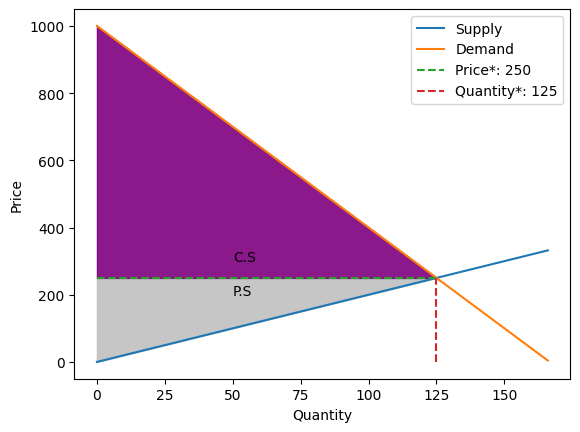

In [99]:
# find inverse of the supply and demand and then calculate the price
graph.market_graph(supply_function, demand_function, complete=True)

In [100]:
price = graph.get_price(supply_function, demand_function)
quantity = graph.get_quantity(supply_function, demand_function)
print(f"Price: {price}, Quantity: {quantity}")

zero_points 500/3
price is around 250
Price: 250, Quantity: 125


In [101]:
#| hide
import nbdev; nbdev.nbdev_export()